Group name: ARGz

Members: Arao, Arzaga, Garcia

General topic: Data processing with Netflix TV and movie data

- predict the genre from other characteristics

- use DataCamp Netflix data and perform ML classification to predict the genre

- test datasets

- We will use a confusion matrix to show the accuracy of the model in predicting genre; we can use this to suggest movies or genres that are applicable


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from transformers import AutoTokenizer, AutoModel

from sklearn import model_selection, decomposition, preprocessing
from sklearn import linear_model, tree, ensemble

In [ ]:
netflix_data = pd.read_csv("datalab_export_2025-04-10-16_28_24.csv")
netflix_data

,index,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,0,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
1,1,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
2,2,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
3,3,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
4,4,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,1,A genetics professor experiments with a treatm...,International TV
...,...,...,...,...,...,...,...,...,...,...,...,...
4807,4807,s7779,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,88,Looking to survive in a world taken over by zo...,Comedies
4808,4808,s7781,Movie,Zoo,Shlok Sharma,"Shashank Arora, Shweta Tripathi, Rahul Kumar, ...",India,"July 1, 2018",2018,94,A drug dealer starts having doubts about his t...,Dramas
4809,4809,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,88,"Dragged from civilian life, a former superhero...",Children
4810,4810,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...",Sweden,"October 19, 2020",2005,99,When Lebanon's Civil War deprives Zozo of his ...,Dramas


In [ ]:
netflix_data_clean = netflix_data.drop(["index", "show_id", "director", "title", "cast", "date_added", "description"], axis = 1)
netflix_data_clean

,type,country,release_year,duration,genre
0,Movie,Mexico,2016,93,Dramas
1,Movie,Singapore,2011,78,Horror Movies
2,Movie,United States,2009,80,Action
3,Movie,United States,2008,123,Dramas
4,TV Show,Turkey,2016,1,International TV
...,...,...,...,...,...
4807,Movie,United States,2009,88,Comedies
4808,Movie,India,2018,94,Dramas
4809,Movie,United States,2006,88,Children
4810,Movie,Sweden,2005,99,Dramas


In [ ]:
np.unique(netflix_data_clean["country"].values)

array(['Argentina', 'Australia', 'Austria', 'Bangladesh', 'Belgium',
       'Brazil', 'Bulgaria', 'Cambodia', 'Canada', 'Chile', 'China',
       'Colombia', 'Croatia', 'Czech Republic', 'Denmark', 'Egypt',
       'Finland', 'France', 'Georgia', 'Germany', 'Ghana', 'Guatemala',
       'Hong Kong', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran',
       'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Kenya',
       'Kuwait', 'Lebanon', 'Malaysia', 'Mexico', 'Namibia',
       'Netherlands', 'New Zealand', 'Nigeria', 'Norway', 'Pakistan',
       'Paraguay', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Romania',
       'Russia', 'Saudi Arabia', 'Serbia', 'Singapore', 'Slovenia',
       'Somalia', 'South Africa', 'South Korea', 'Soviet Union', 'Spain',
       'Sweden', 'Switzerland', 'Taiwan', 'Thailand', 'Turkey',
       'United Arab', 'United Kingdom', 'United States', 'Uruguay',
       'Venezuela', 'Vietnam', 'Zimbabwe'], dtype=object)

<BarContainer object of 72 artists>

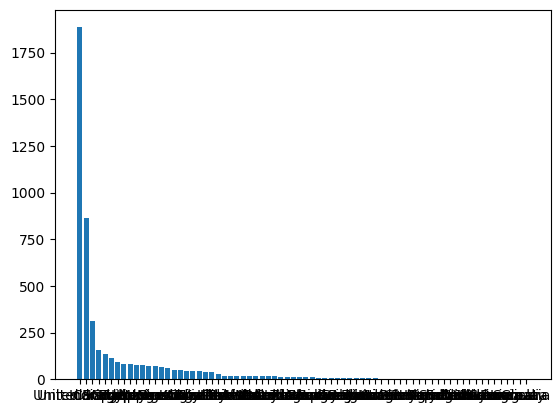

In [ ]:
country_counts = netflix_data_clean["country"].value_counts()

plt.bar(country_counts.index, country_counts.values)

In [ ]:
feature_cols = netflix_data_clean.columns[netflix_data_clean.columns != "genre"]
target_col = "genre"

features = netflix_data_clean.loc[:, feature_cols]
target = netflix_data_clean.loc[:, target_col]

X_train, X_test, y_train, y_test = model_selection.train_test_split(
    features, target, train_size = 0.8, random_state = 0)

1. One-Hot-Encode the countries
2. Embed the title data

# Task
can you tokenize and embed the title column

Here is all the data you need:
"datalab_export_2025-04-10-16_28_24.csv"

## Data loading

### Subtask:
Load the data from the provided CSV file into a pandas DataFrame.


**Reasoning**:
Load the data from the provided CSV file into a pandas DataFrame and display the first few rows and the shape of the DataFrame.



In [ ]:
import pandas as pd

try:
    df = pd.read_csv('datalab_export_2025-04-10-16_28_24.csv')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'datalab_export_2025-04-10-16_28_24.csv' not found.")
except Exception as e:
    print(f"An error occurred: {e}")

,index,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,0,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
1,1,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
2,2,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
3,3,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
4,4,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,1,A genetics professor experiments with a treatm...,International TV


(4812, 12)


## Data preparation

### Subtask:
Prepare the 'title' column for tokenization and embedding.


**Reasoning**:
Extract the 'title' column, handle missing values by replacing them with empty strings, and then print the first 5 values and the shape of the resulting series.



In [ ]:
titles = df['title'].fillna("")
print(titles.head())
print(titles.shape)

0     7:19
1    23:59
2        9
3       21
4       46
Name: title, dtype: object
(4812,)


## Data wrangling

### Subtask:
Tokenize the titles in the `titles` Series.


**Reasoning**:
Tokenize the titles using spaCy and print the first 5 tokenized titles.



In [ ]:
import spacy

try:
    nlp = spacy.load("en_core_web_sm")
except OSError:
    print("Downloading the 'en_core_web_sm' model...")
    from spacy.cli import download
    download("en_core_web_sm")
    nlp = spacy.load("en_core_web_sm")

tokenized_titles = []
for title in titles:
    doc = nlp(str(title))
    tokens = [token.text for token in doc]
    tokenized_titles.append(tokens)

for i in range(5):
    print(tokenized_titles[i])

['7:19']
['23:59']
['9']
['21']
['46']


## Feature engineering

### Subtask:
Generate embeddings for the tokenized titles.


**Reasoning**:
Generate embeddings for the tokenized titles using Sentence Transformers.



In [ ]:
from sentence_transformers import SentenceTransformer, util
import numpy as np

try:
    model = SentenceTransformer('all-mpnet-base-v2')
except Exception as e:
    print(f"Error loading Sentence Transformer model: {e}")
    # Handle the error appropriately, e.g., exit gracefully or use a fallback model.
    # For this example, we'll just print the error and exit.
    exit()

title_embeddings = []
for tokens in tokenized_titles:
    title_string = " ".join(tokens)
    embedding = model.encode(title_string)
    title_embeddings.append(embedding)

title_embeddings = np.array(title_embeddings)
print(title_embeddings.shape)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.4k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

(4812, 768)


In [ ]:
title_embeddings[500]

array([ 1.60799436e-02,  4.41362597e-02, -7.73322163e-03, -3.38359177e-02,
        1.89256947e-02,  5.52393422e-02, -4.67925183e-02,  4.15779799e-02,
       -7.77910138e-03,  3.67796794e-02, -3.93571593e-02, -4.16351743e-02,
       -1.54340444e-02, -2.97589004e-02,  6.78533455e-03, -5.25478385e-02,
        2.36658379e-02, -1.06212776e-02,  2.00691503e-02,  3.91870551e-03,
       -2.58584060e-02,  3.60946245e-02,  1.59848034e-02,  1.72284748e-02,
       -4.43646051e-02, -6.08405285e-02,  3.17946337e-02,  2.60496959e-02,
        1.27260271e-03,  1.88208129e-02,  3.26568298e-02, -1.33583816e-02,
        1.42645678e-02, -5.67099489e-02,  1.25839813e-06,  2.13924702e-02,
        2.62191445e-02, -1.32471966e-02, -5.08447737e-02, -1.99793484e-02,
       -5.49382269e-02,  1.01571288e-02, -1.01814242e-02,  4.90540788e-02,
        4.38776575e-02, -2.95862127e-02,  1.11828139e-02, -1.90351158e-02,
       -3.37485187e-02, -1.75882541e-02,  1.53529849e-02, -2.36335061e-02,
       -8.10698494e-02, -

## Summary:

### 1. Q&A
The task was to tokenize and embed the 'title' column of a dataset.  The process successfully completed all steps: loading the data, preparing the 'title' column, tokenizing the titles using spaCy, and generating embeddings using the Sentence Transformers 'all-mpnet-base-v2' model.

### 2. Data Analysis Key Findings
* **Embedding Dimensionality:** Title embeddings were generated with a dimensionality of 768 using the 'all-mpnet-base-v2' Sentence Transformer model.  (4812, 768)
* **Successful Tokenization:** Titles were successfully tokenized using the spaCy `en_core_web_sm` model.  The tokenization process treated numeric values in the title as single tokens.
* **Data Handling of Missing Values:** Missing values in the 'title' column were replaced with empty strings before tokenization.


### 3. Insights or Next Steps
* **Explore downstream tasks:**  The generated title embeddings can now be used for various downstream tasks such as similarity search, clustering, or as features in a classification or regression model.
* **Experiment with different embedding models:**  Compare the performance of the 'all-mpnet-base-v2' model with other Sentence Transformer models or different embedding techniques to see if improved results can be achieved for specific downstream tasks.


In [ ]:
#Roxy

In [ ]:
roxy_indices = []
for i, tokens in enumerate(tokenized_titles):
  if "13 Sins" in tokens:
    roxy_indices.append(i)

print(f"Indices of titles containing '#Roxy': {roxy_indices}")

Indices of titles containing '#Roxy': []


In [ ]:
roxy_embeddings = [title_embeddings[i] for i in roxy_indices]

print(f"Embeddings for titles containing '#Roxy': {roxy_embeddings}")

Embeddings for titles containing '#Roxy': []


In [ ]:
df['vecemb'] = [i for i in title_embeddings]

In [ ]:
df.head(5)

,index,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre,vecemb
0,0,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas,"[-0.04907608, -0.07842903, 0.033957098, -0.048..."
1,1,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies,"[-0.06200779, -0.024879787, 0.018170988, -0.03..."
2,2,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action,"[-0.033779766, -0.003954821, 0.0022585301, 0.0..."
3,3,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas,"[-0.0050136475, -0.021958401, 0.031959344, -0...."
4,4,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,1,A genetics professor experiments with a treatm...,International TV,"[-0.022827107, -0.043441236, 0.019321524, 0.03..."
